## Objetivos
Detectar errores del dataset:
✔ imágenes corruptas
✔ labels incorrectos o mal formados
✔ bounding boxes fuera de la imagen
✔ clases no válidas
✔ archivos que faltan
✔ distribución de clases
✔ ejemplos visuales de anotaciones

In [5]:
import os
import pandas as pd

images_dir = "./dataset/images/train"
labels_dir = "./dataset/labels/train"


In [11]:
#Comprobar imágenes sin etiqueta (.txt faltante)
images = [f for f in os.listdir(images_dir) if f.endswith((".jpg", ".png"))]

missing = []
for img in images:
    txt = img.rsplit(".", 1)[0] + ".txt"
    if txt not in os.listdir(labels_dir):
        missing.append(img)

print("Imágenes sin etiqueta:", len(missing))
missing[:10]


Imágenes sin etiqueta: 0


[]

In [13]:
# Comprobar etiquetas vacías o con errores
bad_labels = []

for txt in os.listdir(labels_dir):
    if not txt.endswith(".txt"):
        continue
    
    path = os.path.join(labels_dir, txt)
    with open(path, "r") as f:
        lines = f.readlines()
    
    # archivo vacío
    if len(lines) == 0:
        bad_labels.append(txt + " — vacío")
        continue
    
    # formato YOLO incorrecto
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            bad_labels.append(txt + " — formato incorrecto: " + line)
            break

bad_labels[:20]


[]

In [15]:
#Comprobar que las clases están dentro del rango válido
num_classes = 21  

invalid_classes = []

for txt in os.listdir(labels_dir):
    path = os.path.join(labels_dir, txt)
    with open(path, "r") as f:
        for line in f:
            cls = int(line.split()[0])
            if cls < 0 or cls >= num_classes:
                invalid_classes.append((txt, line))
invalid_classes[:10]


[]

In [19]:
# Comprobar bounding boxes fuera del rango [0,1]
invalid_boxes = []

for txt in os.listdir(labels_dir):
    path = os.path.join(labels_dir, txt)
    with open(path, "r") as f:
        for line in f:
            cls, x, y, w, h = map(float, line.split())
            if not (0 <= x <= 1 and 0 <= y <= 1 and 0 <= w <= 1 and 0 <= h <= 1):
                invalid_boxes.append((txt, line))
invalid_boxes[:10]


[]

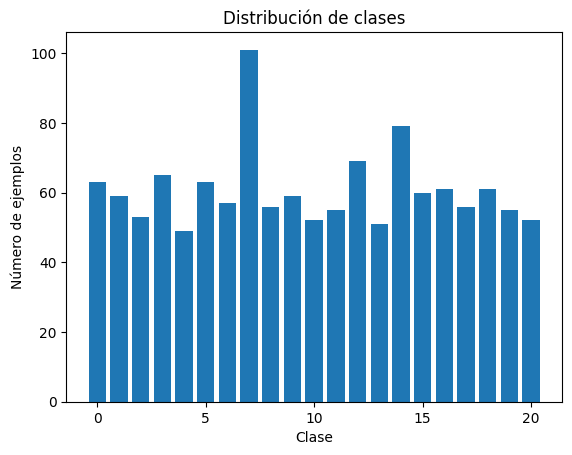

In [23]:
# Ver la distribución de clases
import matplotlib.pyplot as plt

class_counts = {}

for txt in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, txt)) as f:
        for l in f:
            cls = int(l.split()[0])
            class_counts[cls] = class_counts.get(cls, 0) + 1

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.show()


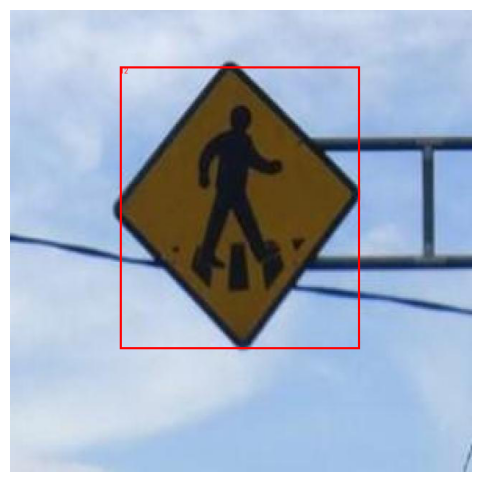

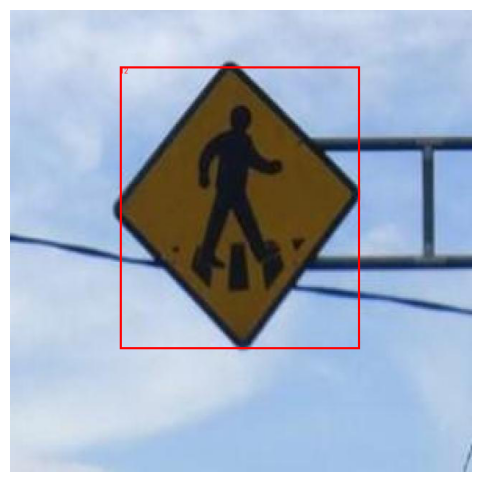

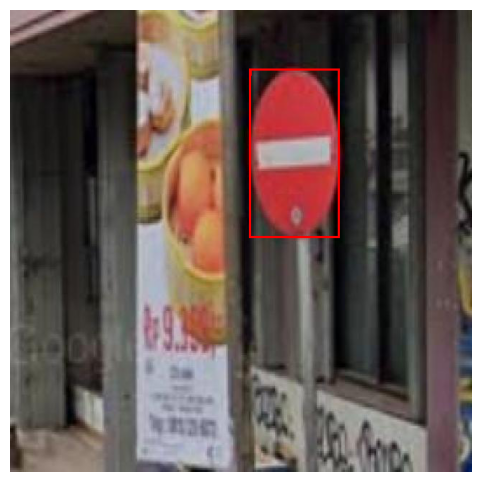

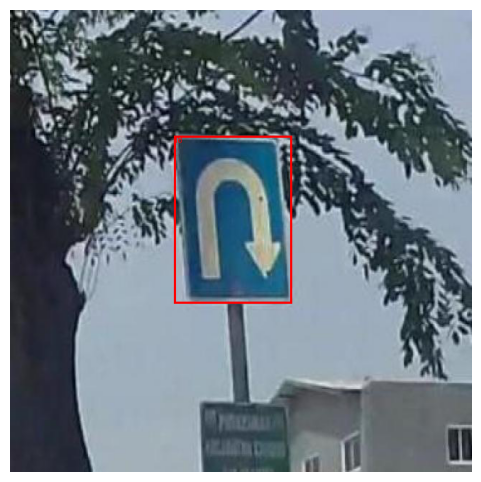

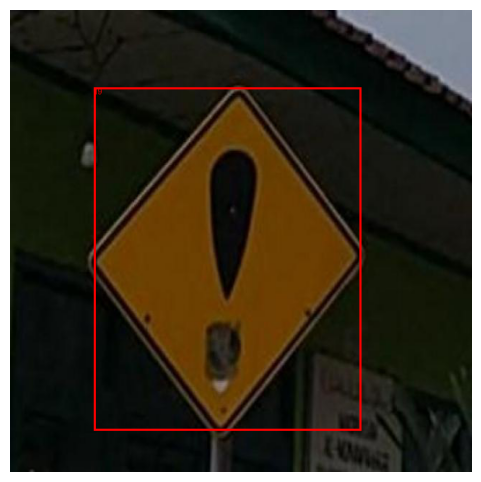

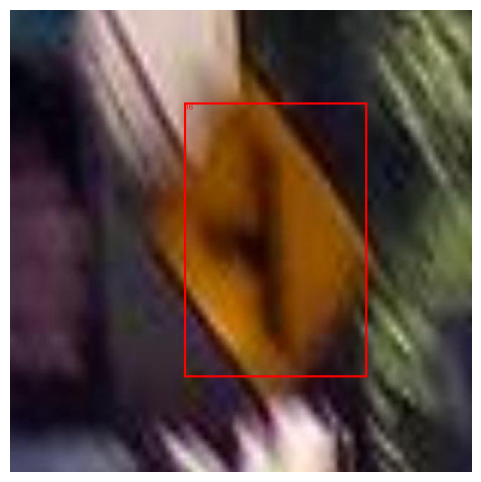

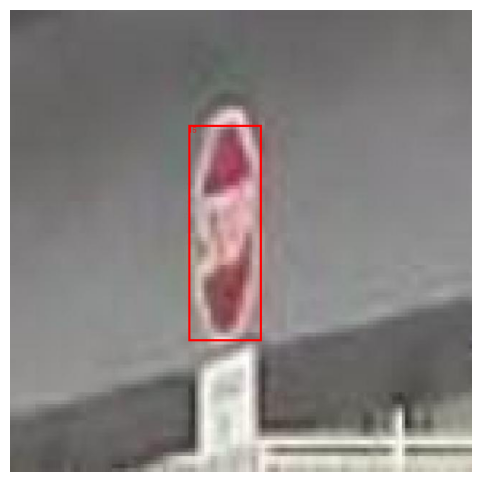

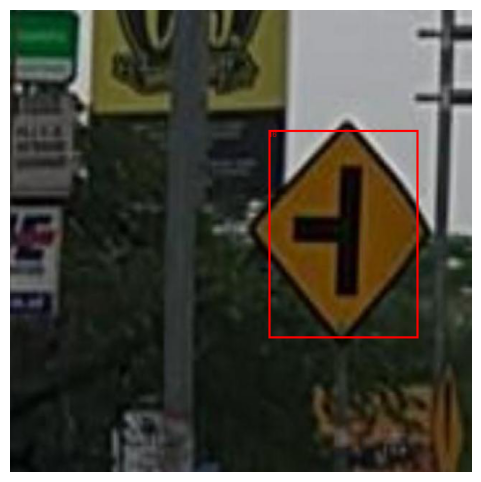

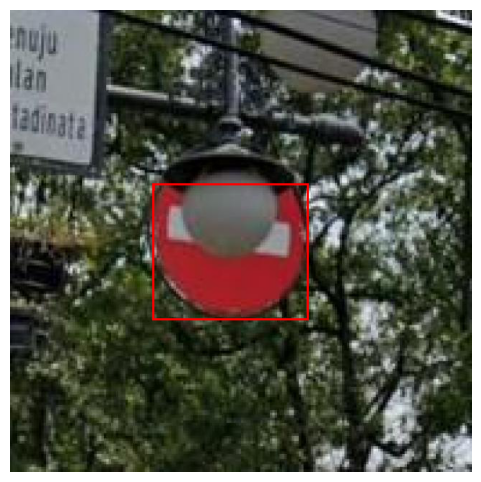

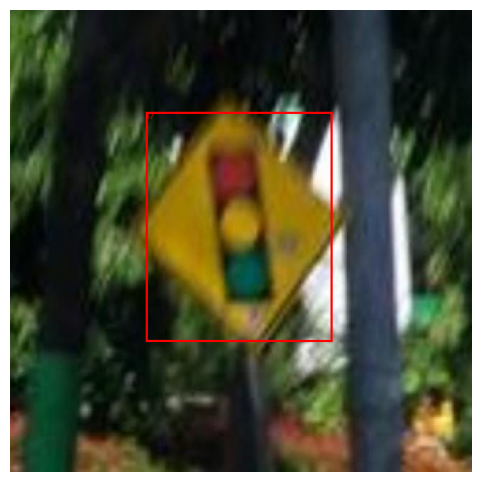

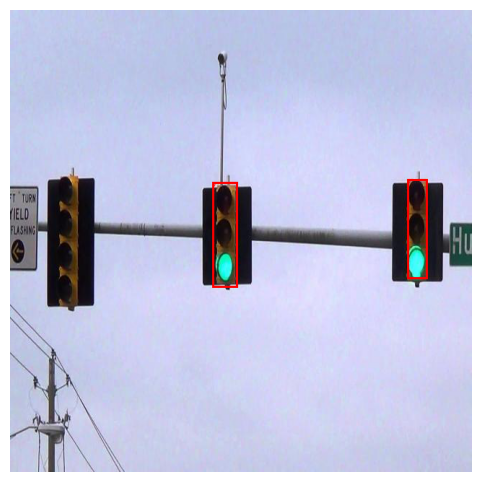

In [27]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def show_image_with_labels(img_name):
    img_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, img_name.rsplit(".",1)[0] + ".txt")

    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    W, H = img.size
    
    with open(label_path) as f:
        for line in f:
            cls, x, y, w, h = map(float, line.split())
            x1 = (x - w/2) * W
            y1 = (y - h/2) * H
            x2 = (x + w/2) * W
            y2 = (y + h/2) * H
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            draw.text((x1, y1), str(int(cls)), fill="red")

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Ejemplo:
show_image_with_labels(images[0])
for i in range(10):
    show_image_with_labels(images[i])
